In [26]:
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
orig_data = pd.read_csv('hirability_balanced.csv').fillna(0)
data = pd.read_csv('hirability_balanced.csv').fillna(0)

data.pop("country")
data = pd.get_dummies(data, drop_first=True)

data.head()

,has_bio,has_blog,followers,followings,commits,public_gist,public_repos,hirable
0,0,0,9,10,12.0,0,18,0
1,0,0,0,0,5.0,0,1,0
2,0,0,1,3,36.0,0,5,0
3,0,1,9,8,55.0,1,9,0
4,0,0,3,4,0.0,0,3,0


In [45]:
column_to_move = data.pop("hirable")
data.insert(0, "hirable", column_to_move)

X = data.iloc[0:, 1:]
y = data.iloc[0:, 0:1]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

### FIND THE VALUE FOR K

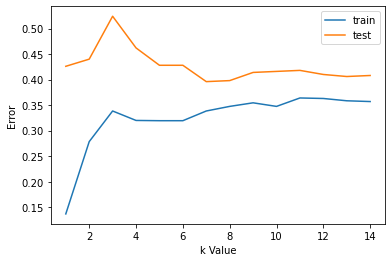

In [47]:
import numpy as np

error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train).reshape(2000,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test).reshape(500,1)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

# Read more at https://bit.ly/3UBPcHM

In [48]:
knn_clf = KNeighborsClassifier(n_neighbors=13)
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [43]:
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix: ')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix: 
[[152  91]
 [112 145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       243
           1       0.61      0.56      0.59       257

    accuracy                           0.59       500
   macro avg       0.60      0.59      0.59       500
weighted avg       0.60      0.59      0.59       500

Accuracy: 0.594
